In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

loading dataset and looking through the items

In [4]:
data = pd.read_csv("spotify_songs.csv")

In [5]:
print(data.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [6]:
data.shape

(32833, 23)

In [7]:
data.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

dropping the missing values

In [8]:
clean_data = data.dropna()


In [9]:
duplicates = data.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [10]:
clean_data.isnull().sum()


track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [11]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudne

Dropping columns our group found not useful for our recommendation system

In [12]:
clean_data.drop(['track_album_id', 'track_album_release_date', 'key', 'mode'], axis=1)

track_id  \
0      6f807x0ima9a1j3VPbc7VN   
1      0r7CVbZTWZgbTCYdfa2P31   
2      1z1Hg7Vb0AhHDiEmnDE79l   
3      75FpbthrwQmzHlBJLuGdC7   
4      1e8PAfcKUYoKkxPhrHqw4x   
...                       ...   
32828  7bxnKAamR3snQ1VGLuVfC1   
32829  5Aevni09Em4575077nkWHz   
32830  7ImMqPP3Q1yfUHvsdn7wEo   
32831  2m69mhnfQ1Oq6lGtXuYhgX   
32832  29zWqhca3zt5NsckZqDf6c   

                                              track_name      track_artist  \
0      I Don't Care (with Justin Bieber) - Loud Luxur...        Ed Sheeran   
1                        Memories - Dillon Francis Remix          Maroon 5   
2                        All the Time - Don Diablo Remix      Zara Larsson   
3                      Call You Mine - Keanu Silva Remix  The Chainsmokers   
4                Someone You Loved - Future Humans Remix     Lewis Capaldi   
...                                                  ...               ...   
32828               City Of Lights - Official Radio Edit      Lush & Simon   
32829                Closer - Sultan & Ned Shepard Remix    Tegan and Sara   
32830                       Sweet Surrender - Radio Edit       Starkillers   
32831                     Only For You - Maor Levi Remix            Mat Zo   
32832                             Typhoon - Original Mix      Julian Calor   

       track_popularity                                   track_album_name  \
0                    66  I Don't Care (with Justin Bieber) [Loud Luxury...   
1                    67                    Memories (Dillon Francis Remix)   
2                    70                    All the Time (Don Diablo Remix)   
3                    60                        Call You Mine - The Remixes   
4                    69            Someone You Loved (Future Humans Remix)   
...                 ...                                                ...   
32828                42                         City Of Lights (Vocal Mix)   
32829                20                                     Closer Remixed   
32830                14                       Sweet Surrender (Radio Edit)   
32831                15                             Only For You (Remixes)   
32832                27                                      Typhoon/Storm   

         playlist_name             playlist_id playlist_genre  \
0            Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
1            Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
2            Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
3            Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
4            Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop   
...                ...                     ...            ...   
32828  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   
32829  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   
32830  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   
32831  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   
32832  ♥ EDM LOVE 2020  6jI1gFr6ANFtT8MmTvA2Ux            edm   

               playlist_subgenre  danceability  energy  loudness  speechiness  \
0                      dance pop         0.748   0.916    -2.634       0.0583   
1                      dance pop         0.726   0.815    -4.969       0.0373   
2                      dance pop         0.675   0.931    -3.432       0.0742   
3                      dance pop         0.718   0.930    -3.778       0.1020   
4                      dance pop         0.650   0.833    -4.672       0.0359   
...                          ...           ...     ...       ...          ...   
32828  progressive electro house         0.428   0.922    -1.814       0.0936   
32829  progressive electro house         0.522   0.786    -4.462       0.0420   
32830  progressive electro house         0.529   0.821    -4.899       0.0481   
32831  progressive electro house         0.626   0.888    -3.361       0.1090   
32832  progressive electro house         0.603   0.884    -4.571       0.0385 

In [13]:
print('### Numerical feature ###','\n')

clean_data.describe()

### Numerical feature ### 



track_popularity  danceability        energy           key  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean          42.483551      0.654850      0.698603      5.373949   
std           24.980476      0.145092      0.180916      3.611572   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32828.000000  32828.000000  32828.000000  32828.000000   
mean      -6.719529      0.565737      0.107053      0.175352   
std        2.988641      0.495667      0.101307      0.219644   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171250      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32828.000000  32828.000000  32828.000000  32828.000000   
mean           0.084760      0.190175      0.510556    120.883642   
std            0.224245      0.154313      0.233152     26.903632   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.961000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918250   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32828.000000  
mean   225796.829779  
std     59836.492346  
min      4000.000000  
25%    187804.500000  
50%    216000.000000  
75%    253581.250000  
max    517810.000000

In [14]:
print('### Categorical feature ###','\n')
clean_data.describe(include=['O'])

### Categorical feature ### 



track_id track_name   track_artist  \
count                    32828      32828          32828   
unique                   28352      23449          10692   
top     7BKLCZ1jbUBVqRi2FVlTVw     Poison  Martin Garrix   
freq                        10         22            161   

                track_album_id track_album_name track_album_release_date  \
count                    32828            32828                    32828   
unique                   22543            19743                     4529   
top     5L1xcowSxwzFUSJzvyMp48    Greatest Hits               2020-01-10   
freq                        42              139                      270   

          playlist_name             playlist_id playlist_genre  \
count             32828                   32828          32828   
unique              449                     471              6   
top     Indie Poptimism  4JkkvMpVl4lSioqQjeAL0q            edm   
freq                308                     247           6043   

                playlist_subgenre  
count                       32828  
unique                         24  
top     progressive electro house  
freq                         1809

In [15]:
features = clean_data[['track_popularity', 'danceability', 'energy','loudness', 'speechiness', 
                              'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']]

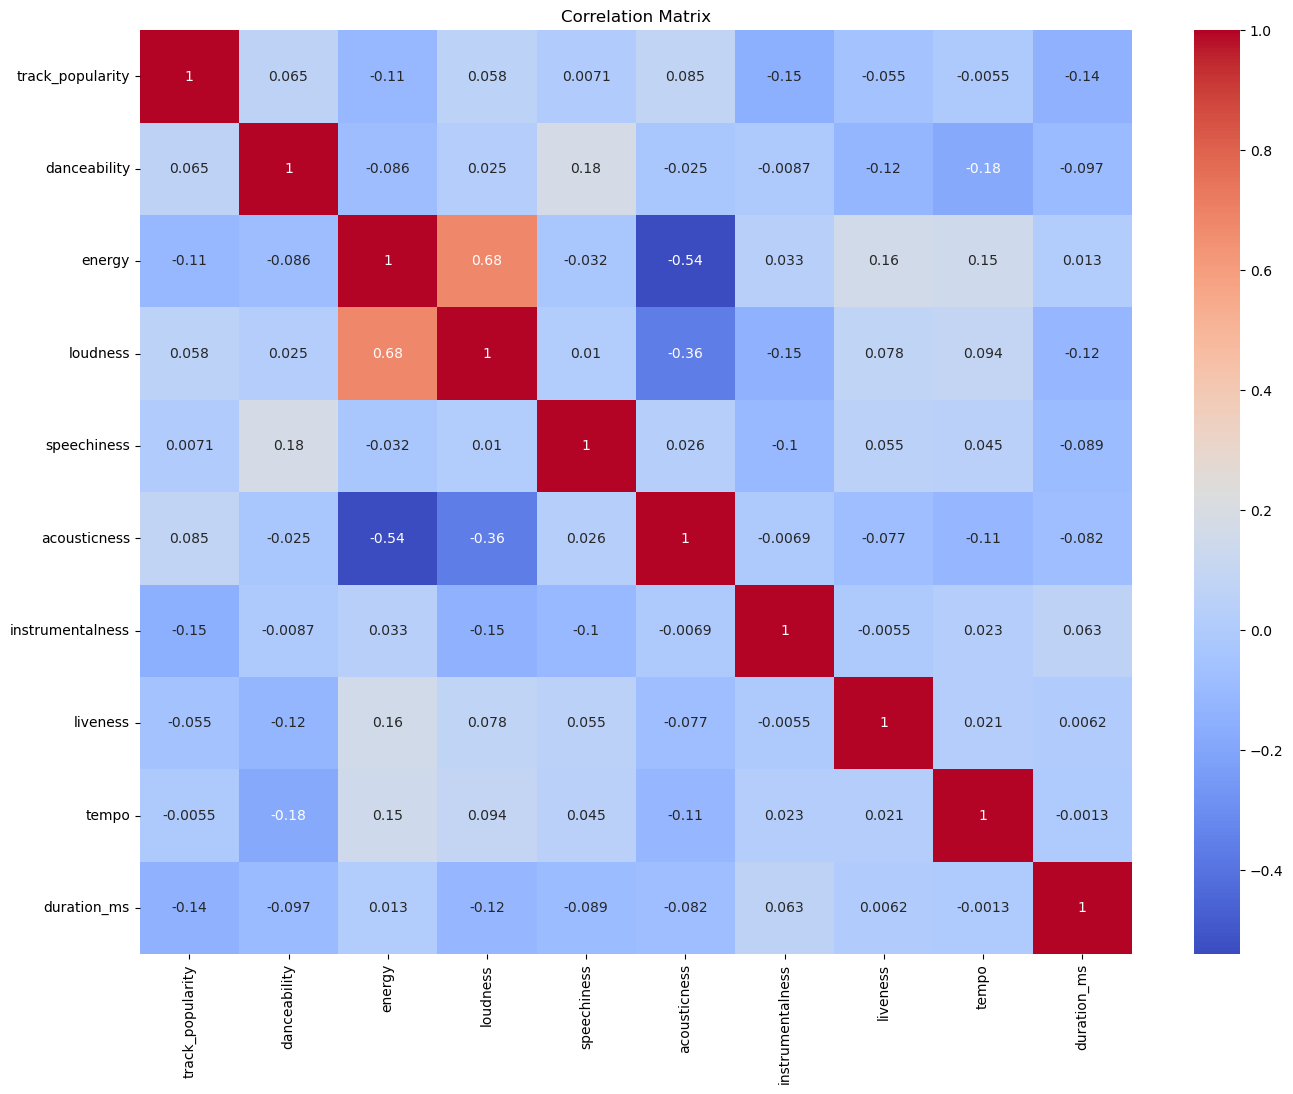

In [16]:
correlation_matrix = features.corr()

plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

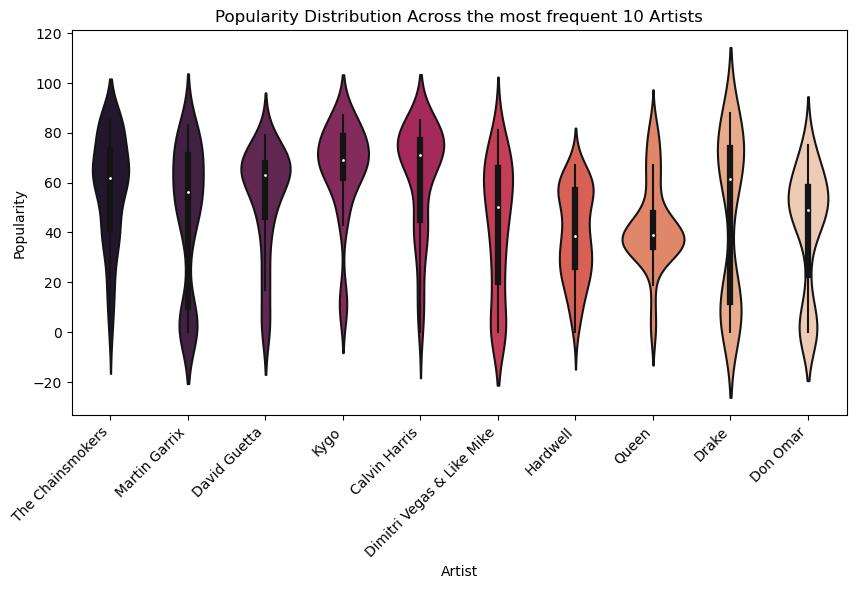

In [17]:
# Filter the DataFrame to include only the most frequent 10 artists
top_artists = clean_data['track_artist'].value_counts().nlargest(10).index
clean_data_top_artists = clean_data[clean_data['track_artist'].isin(top_artists)]

plt.figure(figsize=(10, 5))

sns.violinplot(
    x='track_artist',
    y='track_popularity',
    data=clean_data_top_artists,
    palette='rocket'
)

plt.title('Popularity Distribution Across the most frequent 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')

plt.xticks(rotation=45, ha='right')

plt.show()


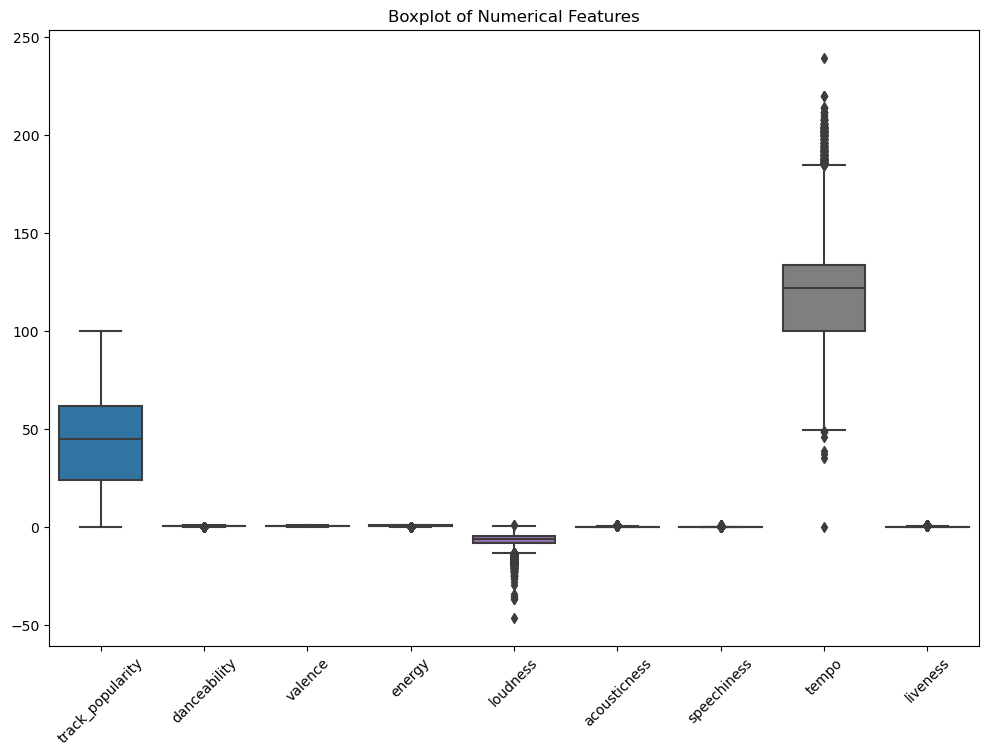

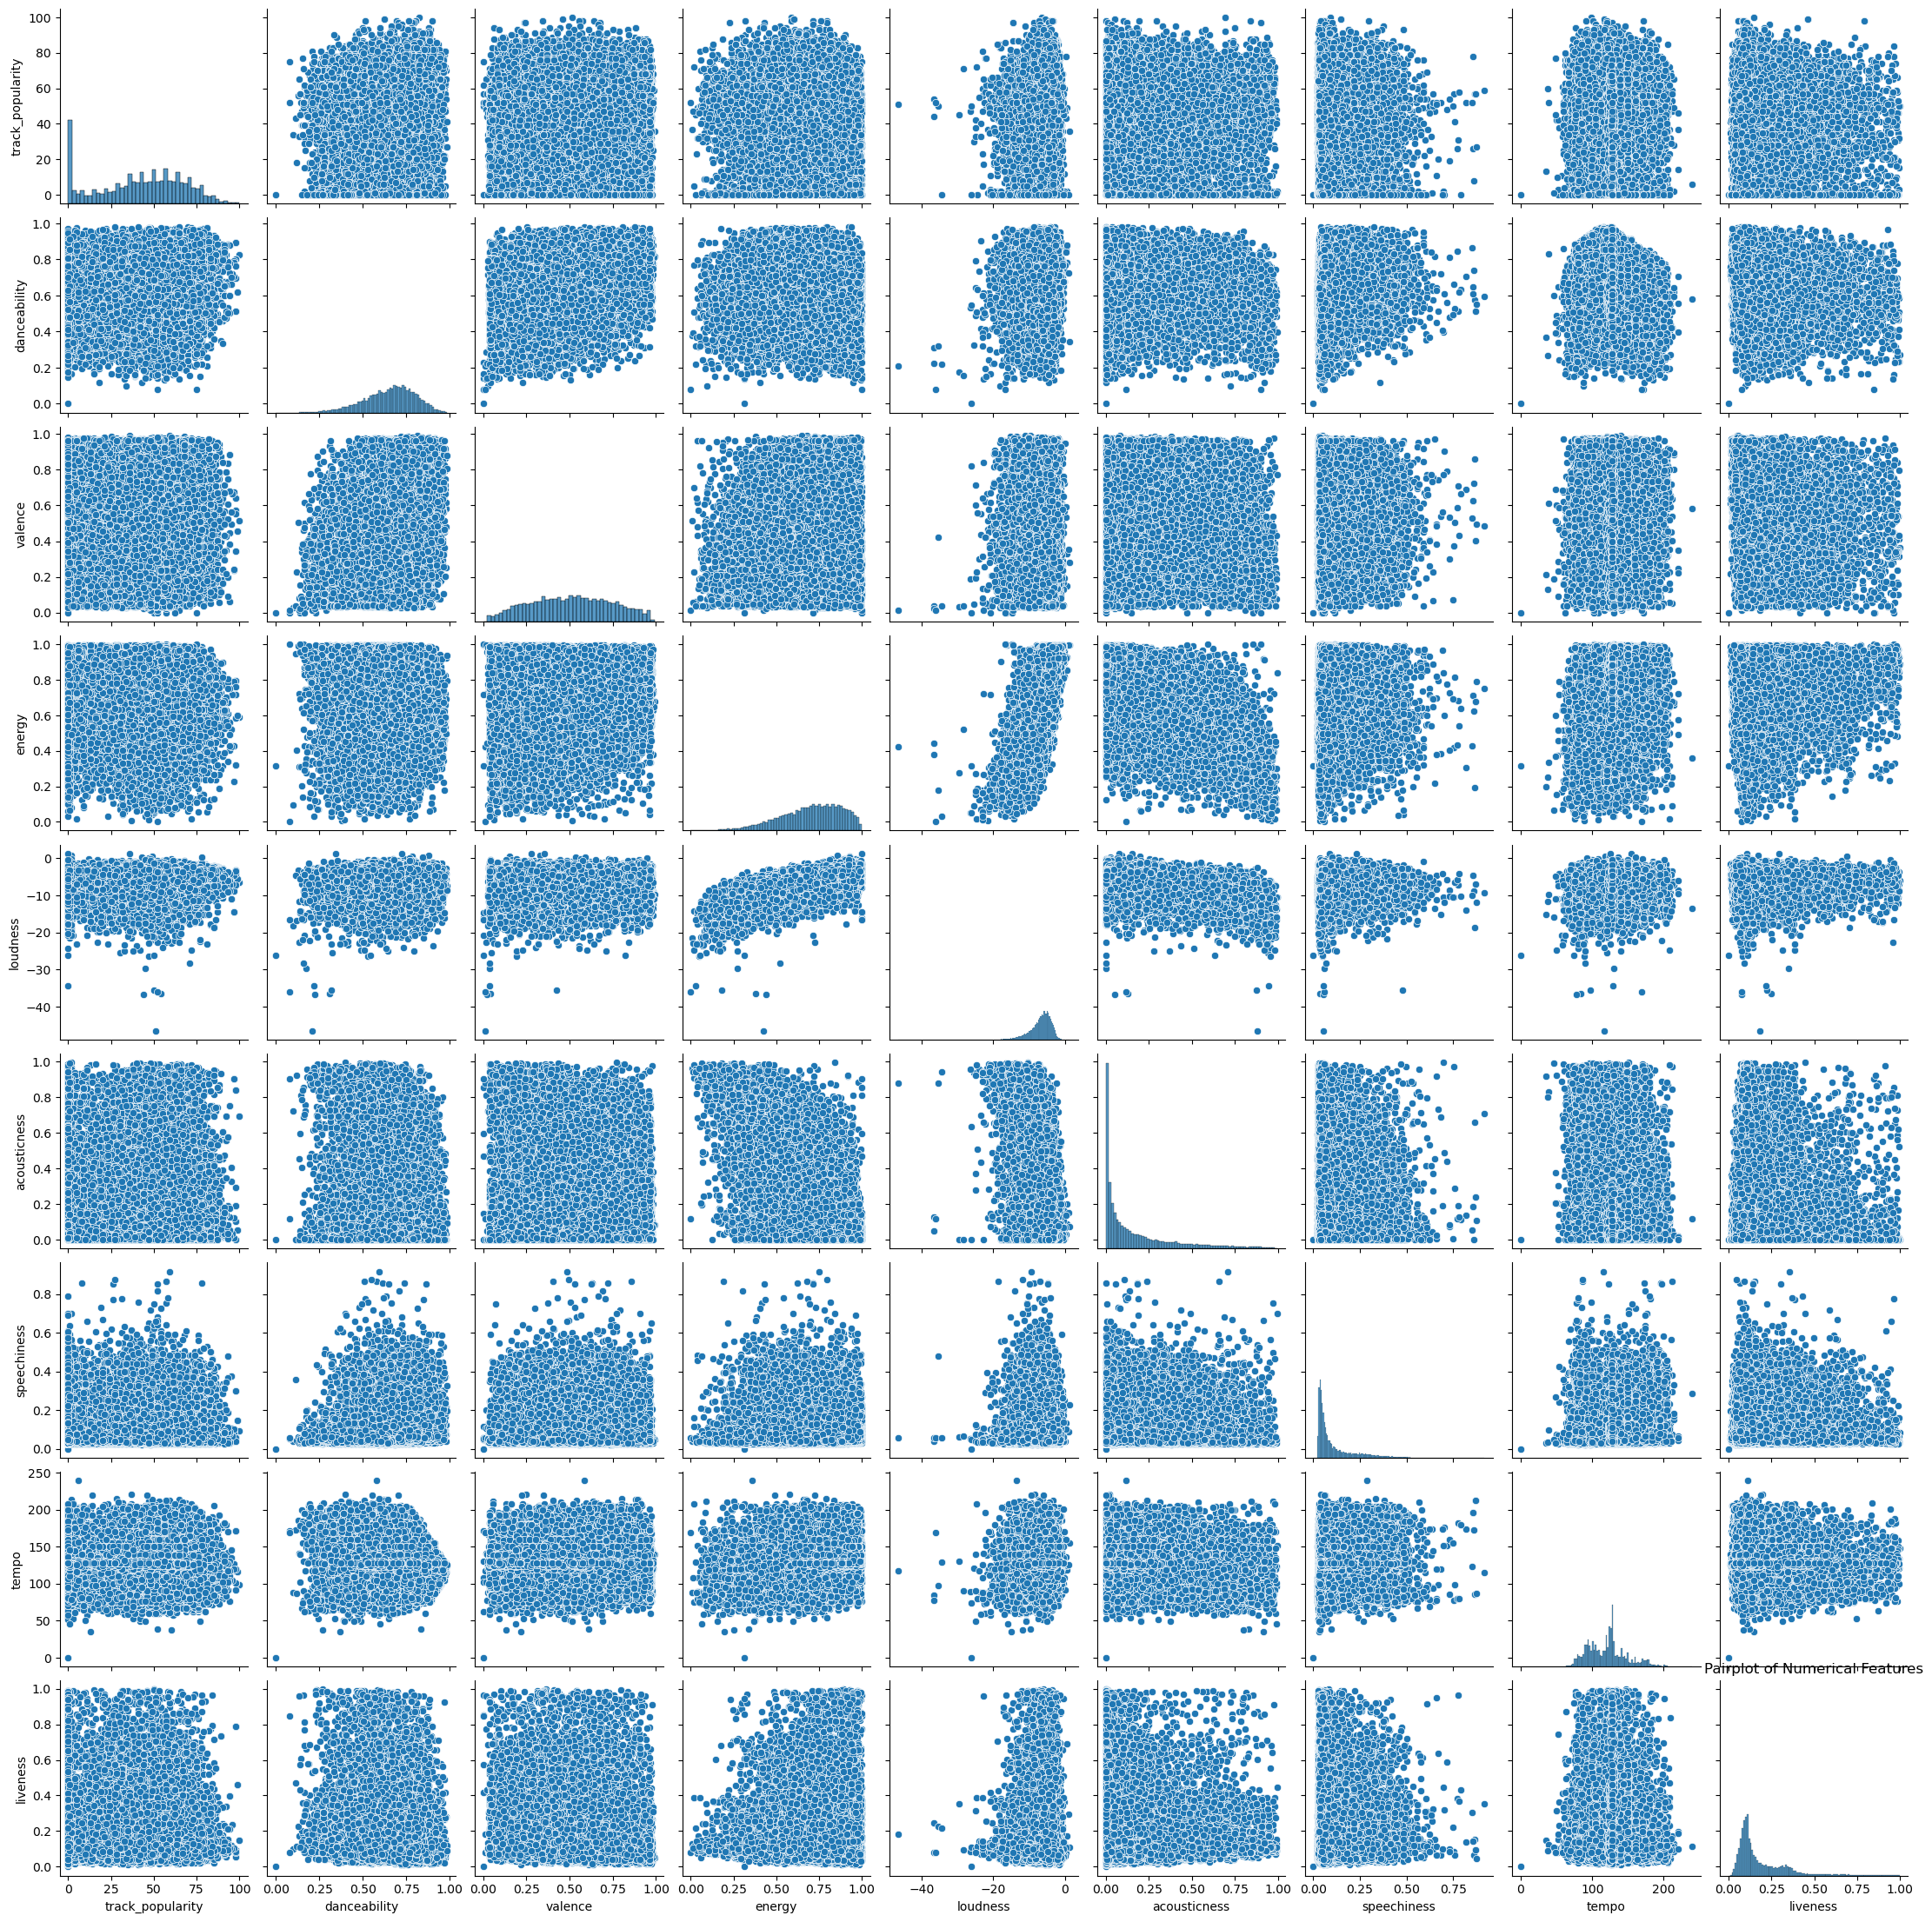

Outliers detected using Z-score:
track_popularity      0
danceability        123
valence               0
energy              166
loudness            368
acousticness        657
speechiness         618
tempo               119
liveness            831
dtype: int64
Outliers detected using IQR method:
track_popularity       0
danceability         291
valence                0
energy               277
loudness            1021
acousticness        2205
speechiness         3174
tempo                571
liveness            1842
dtype: int64


In [18]:
import seaborn as sns

# Calculate Z-score for each numerical feature
z_scores = (clean_data[correlated_features] - clean_data[correlated_features].mean()) / clean_data[correlated_features].std()

# Detect outliers using Z-score (threshold = 3)
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Calculate IQR for each numerical feature
Q1 = clean_data[correlated_features].quantile(0.25)
Q3 = clean_data[correlated_features].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers using IQR method
outliers_iqr = (clean_data[correlated_features] < (Q1 - 1.5 * IQR)) | (clean_data[correlated_features] > (Q3 + 1.5 * IQR))

# Visualize outliers using boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=clean_data[correlated_features])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

# Visualize outliers using scatter plots
sns.pairplot(clean_data[correlated_features])
plt.title('Pairplot of Numerical Features')
plt.show()

# Print outliers detected using Z-score
print("Outliers detected using Z-score:")
print(outliers_zscore.sum())

# Print outliers detected using IQR
print("Outliers detected using IQR method:")
print(outliers_iqr.sum())


In [19]:
correlated_features = ['track_popularity','danceability', 'valence', 'energy', 'loudness', 
                       'acousticness', 'speechiness', 'tempo', 'liveness']

X = clean_data[correlated_features].fillna(0)

In [20]:
from sklearn.neighbors import NearestNeighbors

#Train the KNN model
k = 181  # Number of neighbors to consider
knn_model = NearestNeighbors(n_neighbors=k, metric='euclidean')
knn_model.fit(X)

NearestNeighbors(metric='euclidean', n_neighbors=181)

In [21]:
def recommend_similar_songs(song_title, artist):
    input_song_index = clean_data[(clean_data['track_name'] == song_title) &
                                         (clean_data['track_artist'] == artist)].index
    if len(input_song_index) == 0:
        print("Sorry, the input song is not found in the database")
        return
    
    input_song_index = input_song_index[0]

    # Find the nearest neighbors
    distances, indices = knn_model.kneighbors(X.iloc[input_song_index].values.reshape(1,-1))
    
    # Recommend top 10 similar songs
    similar_songs_indices = indices[0]
    similar_songs_indices = similar_songs_indices[similar_songs_indices != input_song_index]
    similar_songs_indices = list(set(similar_songs_indices))
    similar_songs = clean_data.iloc[similar_songs_indices[:10]]
    return similar_songs[['track_name', 'track_artist']]

# Output
input_song_title = input("Enter the title of a song: ")
input_artist = input("Enter the artist of the song: ")

recommendations = recommend_similar_songs(input_song_title, input_artist)
print("Top 10 songs similar to", input_song_title, "by", input_artist, ":")
print(recommendations)

Enter the title of a song: No Llores
Enter the artist of the song: Jay Kalyl
Top 10 songs similar to No Llores by Jay Kalyl :
                                    track_name     track_artist
16901                         El Son No Morira      Doris Lavin
8195                          Somethin Serious         Big Mike
13319                        Perfect Strangers      Deep Purple
24586         New Jack Swing II - Hard Version  Wreckx-N-Effect
18441                            Feeling Right          DJ Eggs
25610                                 Supplier        Kari Faux
8718                       Уведи меня за собой    Chester Nebro
18449  Te Quiero de Verdad - Versión Salsa Pop   Jay y el Punto
29724             Mad Love - Cheat Codes Remix        Sean Paul
21020                                One Dance            Drake


C:\Users\tsi21\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
